In [63]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from networkx.utils import powerlaw_sequence, random_sequence
from networkx import configuration_model
import scipy.special

In [64]:
def draw_graph(network):
    nx.draw(network, pos=nx.spring_layout(network, 1/np.sqrt(len(network))))  


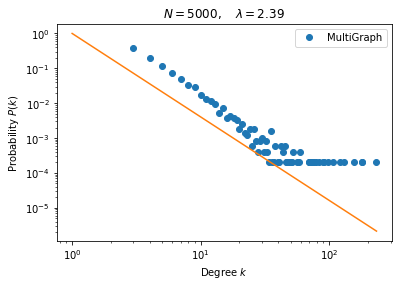

' network = nx.gnp_random_graph(6, 0.7, seed=None, directed=False) scale_free_graph(n, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None, initial_graph=None) draw_graph(network) '

In [65]:
"""scale-free network = la probabilità che un nodo abbia grado k è più o meno k^-lambda, lambda parametro"""

"""Name: {create_scale_free}
   Param: { num_nodes = numero dei nodi sulla rete
            random_edge = numero di edge base che vengono aggiunti a ogni nodo
            prob_trinage = probabiltà oltre agli edge di base di aggiungere un triangolo al nodo
            seed = seed per avere sempre la stessa rete}
   Return: {
            lambda = calcolato sulla base di una media
            graph = il network generato con la power law
            list_deg = lista dei gradi dei nodi in ordine sequenziale
   }
   """
def create_scale_free(num_nodes, random_edge, prob_triangle , seed):
    
    graph = nx.powerlaw_cluster_graph(num_nodes, random_edge, prob_triangle, seed)
    node_degree = list(graph.degree()) #list (node, degree)
    lamda_v = []
    current_edges = 0
    list_deg = []
    for node, degree in node_degree:
        list_deg.append(degree)

    counts = np.bincount(list_deg)
    mask = (counts > 0)
    plt.plot(np.arange(len(counts))[mask], counts[mask] / counts.sum(), "o", label="MultiGraph")
    x = np.arange(1, len(counts))

    for i in range(0, len(list_deg)):
        for j in range(0, len(counts)):
            if (j == list_deg[i]):
                lamda_v.append(np.log2(counts[j]) / list_deg[i])
    lamb = sum(lamda_v) / len(lamda_v)

    plt.plot(x, np.power(x, -lamb))
    plt.xlabel(r"Degree $k$")
    plt.xscale("log")
    plt.ylabel(r"Probability $P(k)$")
    plt.yscale("log")
    plt.title(r"$N = {0:d}, \quad \lambda = {1:.2f}$".format(num_nodes, lamb))
    plt.legend(loc="best")
    plt.show()

    return (graph, lamb, list_deg) 
    
network, lamb, list_deg = create_scale_free(5000, 3, 0.1, random.randint(0, 100000000000000000))

#draw_graph(network)

""" network = nx.gnp_random_graph(6, 0.7, seed=None, directed=False) scale_free_graph(n, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None, initial_graph=None) draw_graph(network) """

In [66]:
""" """
def percolation_one_node_random(network):
    
    lenght_of_list = len(network.nodes)
    print(f'|V| = {lenght_of_list}')
    network.remove_node(random.randint(0, lenght_of_list))
    
    return network

for _ in range(0, 3):
    network = percolation_one_node_random(network)


|V| = 5000
|V| = 4999
|V| = 4998


In [67]:
"""percentuale di nodi tolti sul totale della rete"""

def percolation_loop_removal(network, percentage):
    
    per = round(percentage * len(network.nodes))
    print(f'Nodes to be eliminated = {per}')

    for i in range(0, per):
        network = percolation_one_node_random(network)
    
    return network

network = percolation_loop_removal(network, 0.03)

Nodes to be eliminated = 150
|V| = 4997
|V| = 4996
|V| = 4995
|V| = 4994
|V| = 4993
|V| = 4992
|V| = 4991
|V| = 4990
|V| = 4989
|V| = 4988
|V| = 4987
|V| = 4986
|V| = 4985
|V| = 4984
|V| = 4983
|V| = 4982
|V| = 4981
|V| = 4980
|V| = 4979
|V| = 4978
|V| = 4977
|V| = 4976
|V| = 4975
|V| = 4974
|V| = 4973
|V| = 4972
|V| = 4971
|V| = 4970
|V| = 4969
|V| = 4968
|V| = 4967
|V| = 4966
|V| = 4965
|V| = 4964
|V| = 4963
|V| = 4962
|V| = 4961
|V| = 4960
|V| = 4959
|V| = 4958
|V| = 4957
|V| = 4956
|V| = 4955
|V| = 4954
|V| = 4953
|V| = 4952
|V| = 4951
|V| = 4950
|V| = 4949
|V| = 4948
|V| = 4947
|V| = 4946
|V| = 4945
|V| = 4944
|V| = 4943
|V| = 4942
|V| = 4941
|V| = 4940
|V| = 4939
|V| = 4938
|V| = 4937
|V| = 4936


NetworkXError: The node 2551 is not in the graph.